
# __Springboard Data Science Course__

## _Take Home Challenge_

##### _Ben Takacs_
###### Python verysion 3.10.04

---


## __Part 1: Exploratory data analysis__


## __Imports__

In [68]:
import pandas as pd
import numpy as np
import json
import os

import matplotlib.pyplot as plt
%matplotlib inline

## __Load Data__

In [69]:
f = open('logins.json') # open file
df = pd.DataFrame(json.load(f)) # load data as dataframe
f.close() # close file
df = df.rename(columns={'login_time':'logins'})
df

,logins
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [70]:
df.logins = pd.to_datetime(df.logins)
df.isnull().sum()

logins    0
dtype: int64

In [74]:
df = df.set_index(df.logins)
df = df.drop(columns='logins')
df['a'] = 1
df

,a
logins,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1
...,...
1970-04-13 18:50:19,1
1970-04-13 18:43:56,1
1970-04-13 18:54:02,1


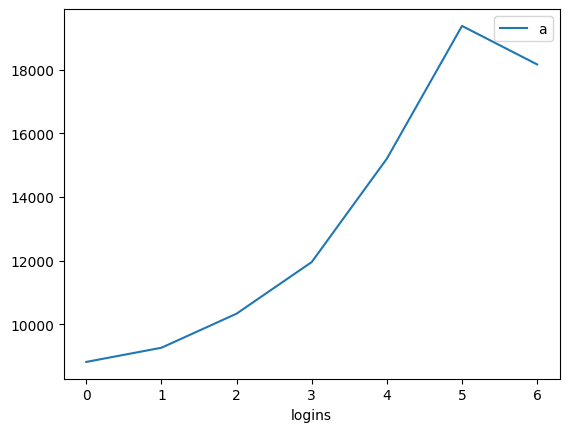

In [83]:
df.groupby(df.index.day_of_week).count().plot(kind="line")
plt.show()

Logins increase throughout week, maxing out on Saturday, but still high Sunday.

<Axes: xlabel='logins'>

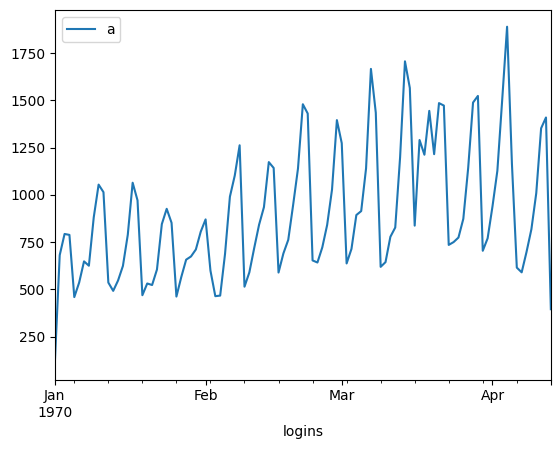

In [104]:
# Aggregate into days
days = df.resample('d').count()
days.plot()

Logins have weekly seasonality, trend is generally increasing

In [125]:
# agg = df.resample('15min').groupby(df.index.time).count()
# group = agg.groupby(agg.index.time)
agg = df.resample('15min').count()
# agg.groupby((agg.index.weekday, agg.index.time))
agg = agg.groupby(pd.Grouper(freq='W')).sum()
# agg = agg.groupby(agg.index.weekday).sum()
agg

,a
logins,
1970-01-04,2374
1970-01-11,5217
1970-01-18,5023
1970-01-25,4751
1970-02-01,4744
1970-02-08,5572
1970-02-15,5915
1970-02-22,7035
1970-03-01,6554


/var/folders/qj/vjvpkp3d3rq87m_14mc70r_00000gn/T/ipykernel_67119/1308007551.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  time = pd.to_datetime(agg.index.astype(str))


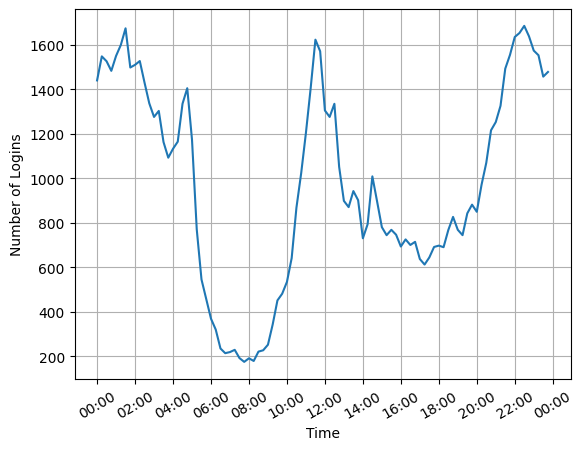

In [115]:
import matplotlib.dates as mdates
time = pd.to_datetime(agg.index.astype(str))

plt.plot()
# group.plot()
plt.plot(time, agg.values)
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Every 2 hours
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))  # Format as HH:MM
plt.xticks(rotation=30)
plt.xlabel('Time')
plt.ylabel('Number of Logins')
plt.grid(True)
plt.show()

From here we can see that the majority of logins occur about every 9 hours, starting around 2 AM, then 11 AM, then 10 PM. There is a huge drop of logins between about 5 AM and 11 AM, where it reaches one of three login peaks. Demand is high from midnight to 5 AM, and then again from for an hour from 11 AM to 1 PM, and again from 9 PM to midnight.


---

## __Part 2: Experiment and metrics design__


Info given: complementary circadian rythms, Gotham active weekday nights, Metro actie weekday days, both active weekends. Toll bridge between two, drivers tend to be city-exclusive. Propose experiment to encourage drivers to be available in both cities by reimbursing toll costs.

&emsp;


### 1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

>The key measure of success would be additional profits, making sure of two things:  
>1. that the new driver arrangement is more efficient than the previous in that more profit is generated (otherwise why are we doing it)  
>1.  that the cost of toll reimbursements is being covered and surpassed (otherwise we're losing money)  


### 2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success

A practical experiment to compare effectiveness would be as follows. 
#### Implementation
We can implement the experiment by making jobs available to driver partners in either city, such that Metropolis jobs are available to Gotham drivers and vice versa. I believe it's important to conduct this experiment as an option rather than an experiment, because even though it lessens the impact of the choice and may make the experiment harder to quantize, forced business practices like this can easily decrease efficiency and profit, which is the opposite of our goal.  
With drivers being able to pick up jobs in the other city, I believe this will have the greatest impact on night drivers and jobs that take place during the more inactive time in the other city from the driver. This is because during the day, the city most likely has day-to-day operations covered. For example, during the weekday when Metropolis is active and Gotham is more inactive, night drivers in Gotham who may not have a lot of work can pick up extra jobs in active Metropolis, and if there are too many active drivers in Metropolis, some can pick up a job in Gotham, as there would be fewer drivers active. Thus, opening the bridge acts a balancing mechanism, when Metropolis needs more drivers Gotham can supply, and vice versa.  
I think the weekends would be relatively unaffected, due to the similar activity levels, but the balancing mechanism would still be able to come into play.  
#### Verify Significance
Tests to verify the significance of the experiment would be, for example, comparing how many jobs are left unfulfilled before and after the bridge opening, if and how much more money drivers are making on average, taking into account the bridge toll.  
Statistically verifying the significance could involve a t-test to see if the mean profit before bridge opening increases post bridge opening. Another test would be seeing if there's correlation between the driver data pre and post bridge opening: before the bridge opening there should be no correlation, but after the opening there should be at least some correlation.
#### Interpretation
If we see correlation between driver data after bridge opening then we know at least that opening the bridge is having an impact, and do determine whether its a positive or negative impact, we need to investigate what happens to the mean revenue generated by driving partners in each city. Seeing an increase in the mean revenue from each city increase would mean that more money is being generated by drivers due to the bridge opening, and that the experiment is a success. We could also look at data from the toll company, and find out when drivers from either city most often cross the bridge to verify that our assumptions of what will happen are correct (drivers crossing during their inactive times). A caveat would be that drivers from another city picking up jobs would take away money from that city, but these would most often be jobs that otherwise couldn't be fulfilled by native drivers.


## __Part 3: Predictive modeling__


### __Load Data__

In [13]:
f = open('ultimate_data_challenge.json') # open file
df = pd.DataFrame(json.load(f)) # load in dataframe
f.close() # close file

In [14]:
df

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [22]:
df = df.convert_dtypes()
df.signup_date = pd.to_datetime(df.signup_date)
df.last_trip_date = pd.to_datetime(df.last_trip_date)

In [23]:
df.dtypes

city                      string[python]
trips_in_first_30_days             Int64
signup_date               datetime64[ns]
avg_rating_of_driver             Float64
avg_surge                        Float64
last_trip_date            datetime64[ns]
phone                     string[python]
surge_pct                        Float64
ultimate_black_user              boolean
weekday_pct                      Float64
avg_dist                         Float64
avg_rating_by_driver             Float64
dtype: object

In [24]:
df.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

400 and 200 are a fraction of 50000, so we can probably drop those, need to do something else with avg driver rating though.

In [39]:
df[(df.phone.isnull()) & (df.avg_rating_by_driver.isnull())]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
3866,King's Landing,1,2014-01-24,<NA>,1.0,2014-01-25,<NA>,0.0,False,0.0,5.71,<NA>
39498,Winterfell,0,2014-01-29,<NA>,1.0,2014-05-18,<NA>,0.0,False,0.0,13.91,<NA>
43180,Winterfell,1,2014-01-10,5.0,1.0,2014-01-11,<NA>,0.0,True,100.0,3.75,<NA>


Almost no overlap between phone null and avg rating by driver null, so we'll lose about 1% of data by removing those rows.

In [50]:
dfr = df.dropna(subset=['phone', 'avg_rating_by_driver'])
dfr

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.1,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.0,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.0,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.0,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,<NA>,1.0,2014-01-25,iPhone,0.0,False,0.0,0.0,4.0
49997,Winterfell,0,2014-01-31,5.0,1.0,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.0,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [52]:
print(dfr.avg_rating_of_driver.mean(), dfr.avg_rating_of_driver.min(), dfr.avg_rating_of_driver.max())

4.601720352274088 1.0 5.0
